In [ ]:
# images for ISS - Honza Cernocky, 2022
# Py Nb created with great help of Petr Palka's work (see self-study component of ISS project!)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.signal import convolve2d, medfilt, spectrogram, lfilter, freqz, tf2zpk
from scipy.fftpack import dct, idct, dctn, idctn

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/NEW_PRED/08_images/lena_cb.tif

# >>>>>>>>>>>>>>>>> #reading_and_visualization <<<<<<<<<<<<<<<<<<<<<<<<<
filename = 'lena_cb.tif'
img = plt.imread(filename)  # format is included in name
x = img.astype(float) / 255

# whole image
_, ax = plt.subplots(1,2, figsize=(12,15))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
# zoom
kmin = 250
kmax = 270
lmin = 315
lmax = 360
ax[1].imshow(x[kmin:kmax,lmin:lmax], 'gray', extent=[lmin,lmax,kmax,kmin],vmin=0, vmax=1)


In [ ]:
# >>>>>>>>>>>>>>>>> #pixel_operations_brightness <<<<<<<<<<<<<<<<<<<<<<<<<
# more
a = 0.5
y = x + a
_, ax = plt.subplots(1,2, figsize=(12,15))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[0].set_title(r'$x[n]$')
ax[1].imshow(y, 'gray', vmin=0, vmax=1)
ax[1].set_title(r'$y[n]$')

# less
a = -0.5
y = x + a
_, ax = plt.subplots(1,2, figsize=(12,15))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[0].set_title(r'$x[n]$')
ax[1].imshow(y, 'gray', vmin=0, vmax=1)
ax[1].set_title(r'$y[n]$')


Text(0.5, 1.0, '$y[n]$')

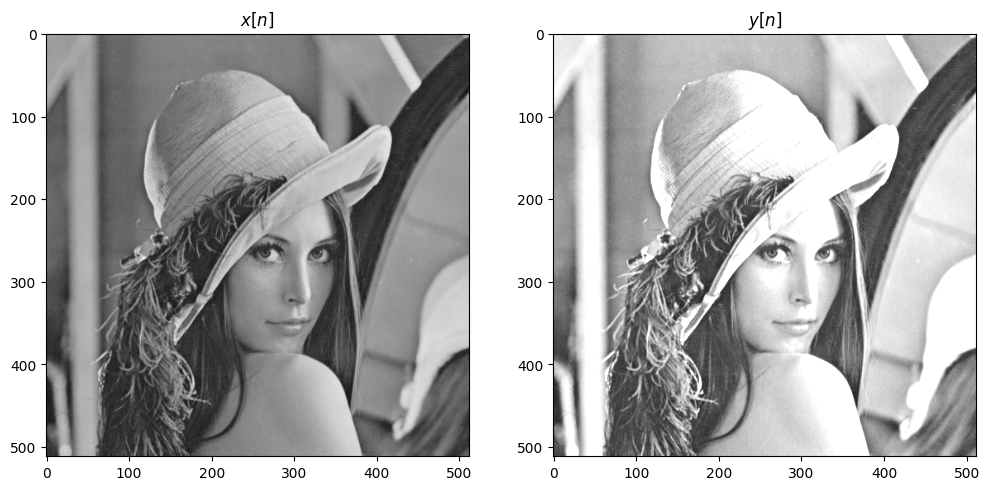

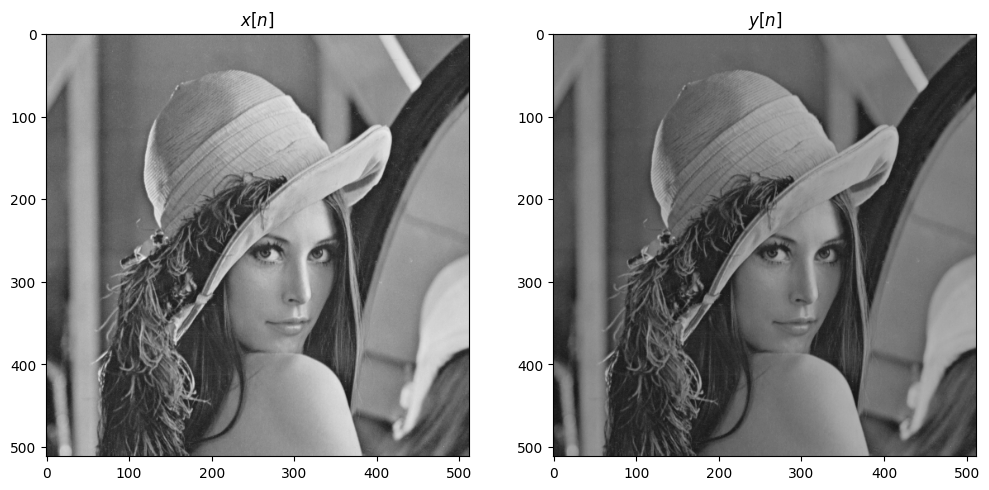

In [ ]:
# >>>>>>>>>>>>>>>>> #pixel_operations_contrast <<<<<<<<<<<<<<<<<<<<<<<<<
# more
a = 1.5
y = a * x
_, ax = plt.subplots(1,2, figsize=(12,15))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[0].set_title(r'$x[n]$')
ax[1].imshow(y, 'gray', vmin=0, vmax=1)
ax[1].set_title(r'$y[n]$')

# less
a = 0.8
y = a * x
_, ax = plt.subplots(1,2, figsize=(12,15))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[0].set_title(r'$x[n]$')
ax[1].imshow(y, 'gray', vmin=0, vmax=1)
ax[1].set_title(r'$y[n]$')


Text(0.5, 1.0, '$y[n]$')

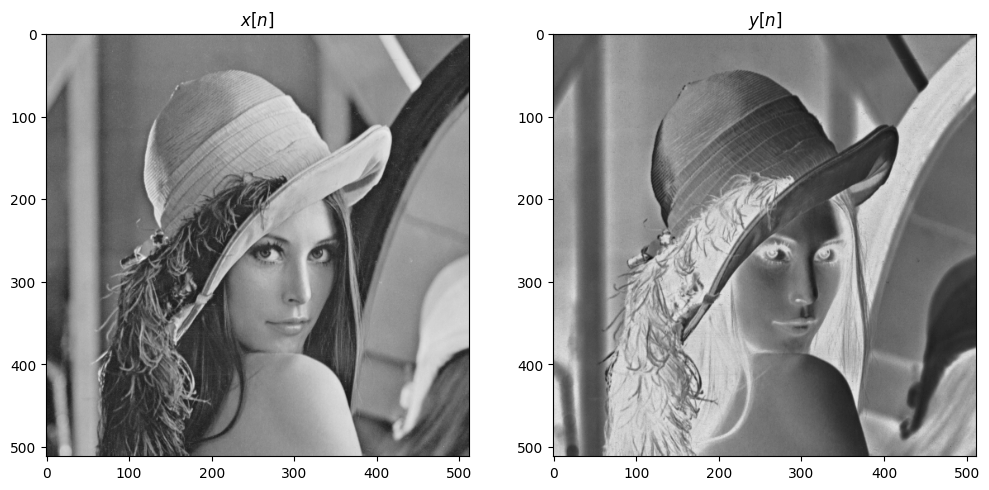

In [ ]:
# >>>>>>>>>>>>>>>>> #pixel_operations_inversion <<<<<<<<<<<<<<<<<<<<<<<<<
y = 1-x
_, ax = plt.subplots(1,2, figsize=(12,15))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[0].set_title(r'$x[n]$')
ax[1].imshow(y, 'gray', vmin=0, vmax=1)
ax[1].set_title(r'$y[n]$')


Text(0.5, 1.0, '$y[n]$')

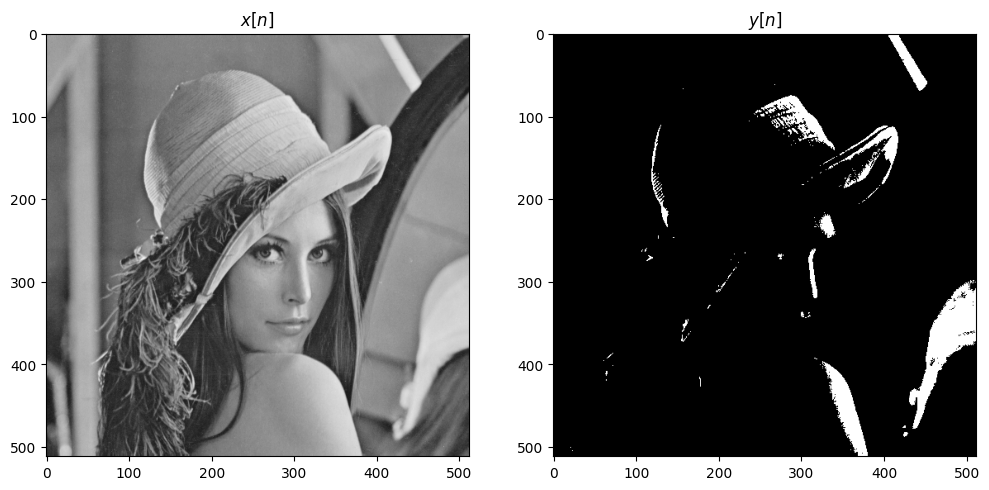

In [ ]:
# >>>>>>>>>>>>>>>>> #pixel_operations_thresholding <<<<<<<<<<<<<<<<<<<<<<<<<
thr = 0.8
y = np.zeros(x.shape)
y[x > thr] = 1
_, ax = plt.subplots(1,2, figsize=(12,15))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[0].set_title(r'$x[n]$')
ax[1].imshow(y, 'gray', vmin=0, vmax=1)
ax[1].set_title(r'$y[n]$')


Text(0.5, 1.0, 'cummulative distribution function')

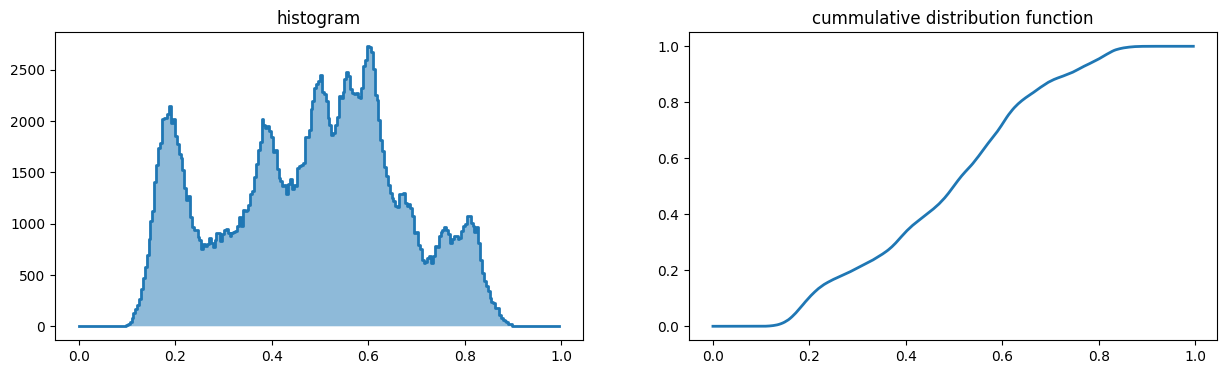

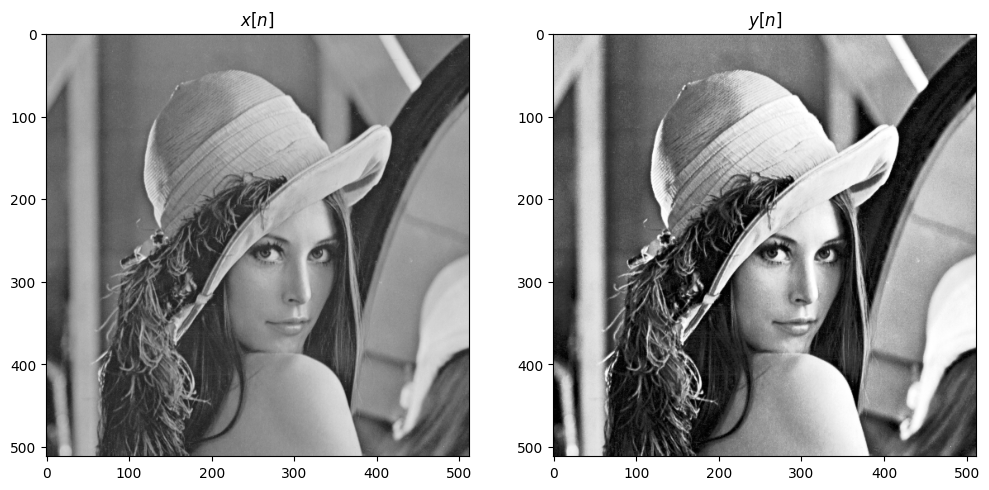

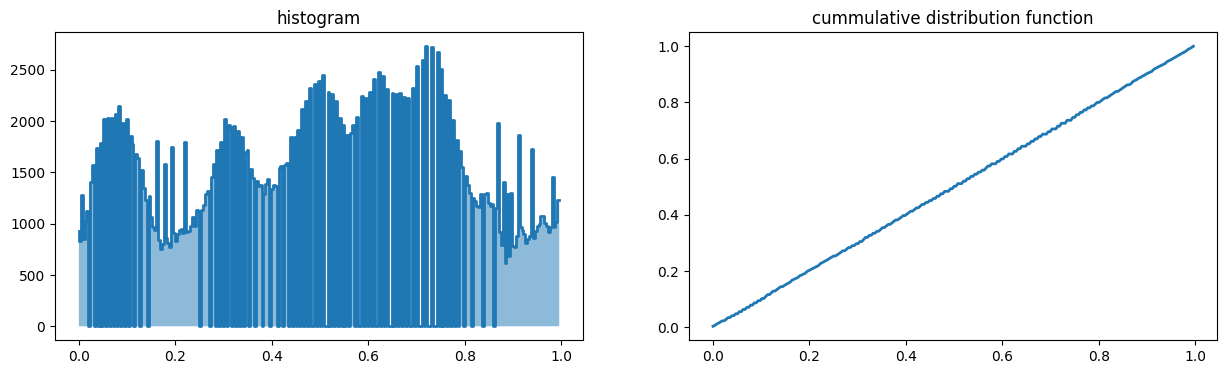

In [ ]:
# >>>>>>>>>>>>>>>>> #pixel_operations_histogram_eq  <<<<<<<<<<<<<<<<<<<<<<<<<
bins = np.linspace(0,1,257)

# histogram and CDF
hist,_ = np.histogram(x.flatten(), bins)
_, ax = plt.subplots(1,2, figsize=(15,4))
binsvisu = bins[:-1]
cs = np.cumsum(hist / img.size)
ax[0].fill_between(binsvisu, hist, step='pre', alpha=0.5)
ax[0].plot(binsvisu, hist, drawstyle='steps', linewidth=2)
ax[0].set_title('histogram')
ax[1].plot(binsvisu, cs, linewidth=2)
ax[1].set_title('cummulative distribution function')

# new image with mapped values ...
y = cs[((x * 256).astype(int))]
_, ax = plt.subplots(1,2, figsize=(12,15))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[0].set_title(r'$x[n]$')
ax[1].imshow(y, 'gray', vmin=0, vmax=1)
ax[1].set_title(r'$y[n]$')

# histogram and CDF
hist,_ = np.histogram(y.flatten(), bins)
_, ax = plt.subplots(1,2, figsize=(15,4))
binsvisu = bins[:-1]
cs = np.cumsum(hist / img.size)
ax[0].fill_between(binsvisu, hist, step='pre', alpha=0.5)
ax[0].plot(binsvisu, hist, drawstyle='steps', linewidth=2)
ax[0].set_title('histogram')
ax[1].plot(binsvisu, cs, linewidth=2)
ax[1].set_title('cummulative distribution function')


[[1]]


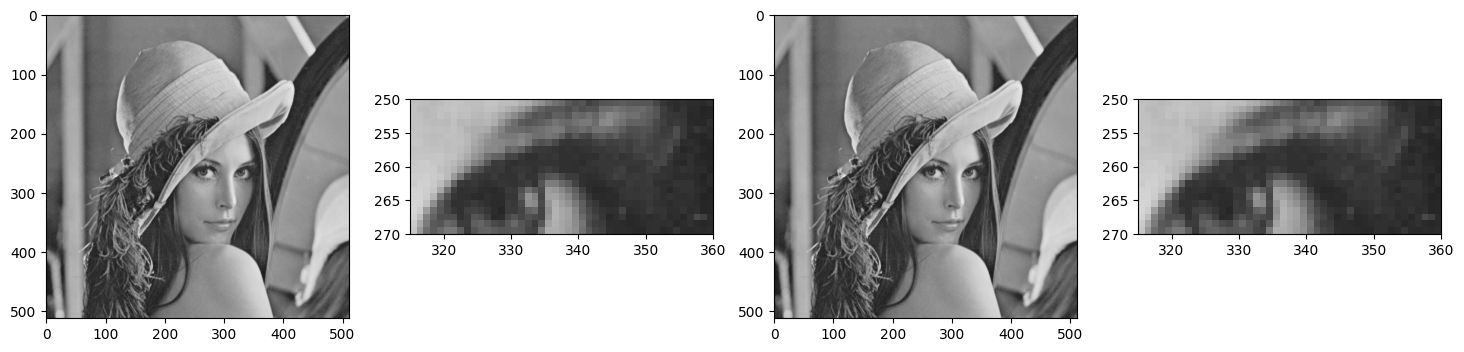

In [ ]:
# >>>>>>>>>>>>>>>>> #2d_filter_examples  <<<<<<<<<<<<<<<<<<<<<<<<<
# zoom values
kmin = 250
kmax = 270
lmin = 315
lmax = 360

# --- wire ---
_, ax = plt.subplots(1,4, figsize=(18,20))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[1].imshow(x[kmin:kmax,lmin:lmax], 'gray', extent=[lmin,lmax,kmax,kmin],vmin=0, vmax=1)
h = [[1]]
print(h)
y = convolve2d(x,h)
ax[2].imshow(y, 'gray', vmin=0, vmax=1)
ax[3].imshow(y[kmin:kmax,lmin:lmax], 'gray', extent=[lmin,lmax,kmax,kmin],vmin=0, vmax=1)


[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


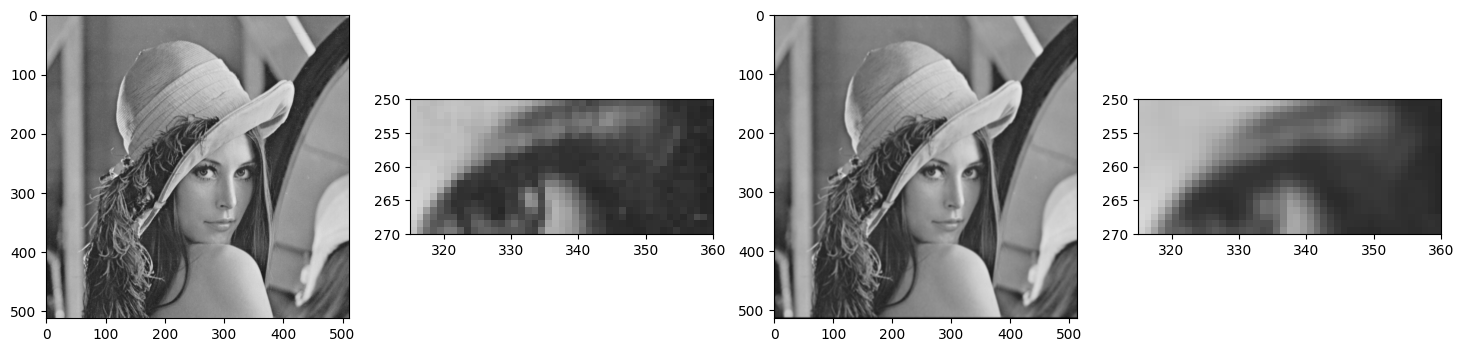

In [ ]:
# --- smooth ---
_, ax = plt.subplots(1,4, figsize=(18,20))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[1].imshow(x[kmin:kmax,lmin:lmax], 'gray', extent=[lmin,lmax,kmax,kmin],vmin=0, vmax=1)
h = np.ones((3,3)) / 9
print(h)
y = convolve2d(x,h)
ax[2].imshow(y, 'gray', vmin=0, vmax=1)
ax[3].imshow(y[kmin:kmax,lmin:lmax], 'gray', extent=[lmin,lmax,kmax,kmin],vmin=0, vmax=1)


[[-1. -1. -1.]
 [-1.  9. -1.]
 [-1. -1. -1.]]


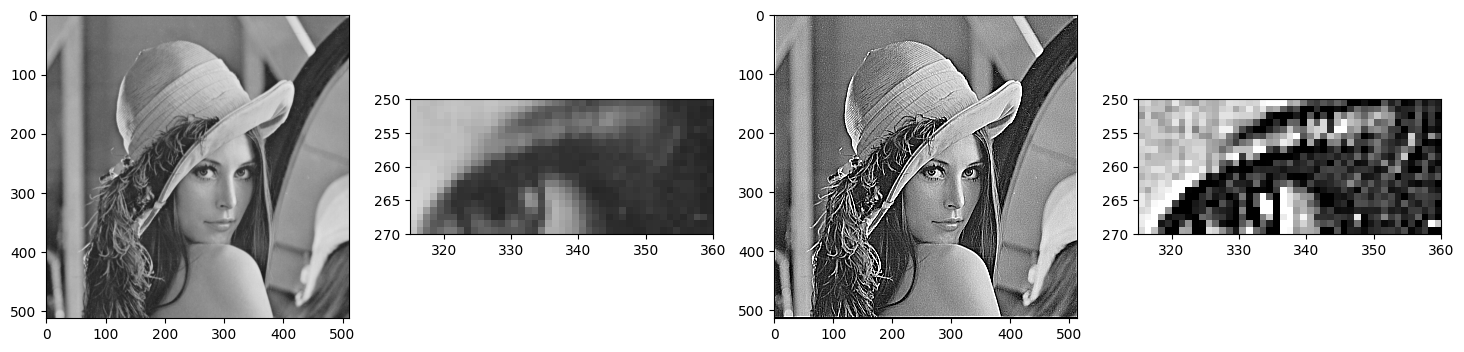

In [ ]:
# --- sharp ---
_, ax = plt.subplots(1,4, figsize=(18,20))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[1].imshow(x[kmin:kmax,lmin:lmax], 'gray', extent=[lmin,lmax,kmax,kmin],vmin=0, vmax=1)
h = -np.ones((3,3))
h[1,1] = 9
print(h)
y = convolve2d(x,h)
ax[2].imshow(y, 'gray', vmin=0, vmax=1)
ax[3].imshow(y[kmin:kmax,lmin:lmax], 'gray', extent=[lmin,lmax,kmax,kmin],vmin=0, vmax=1)


[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


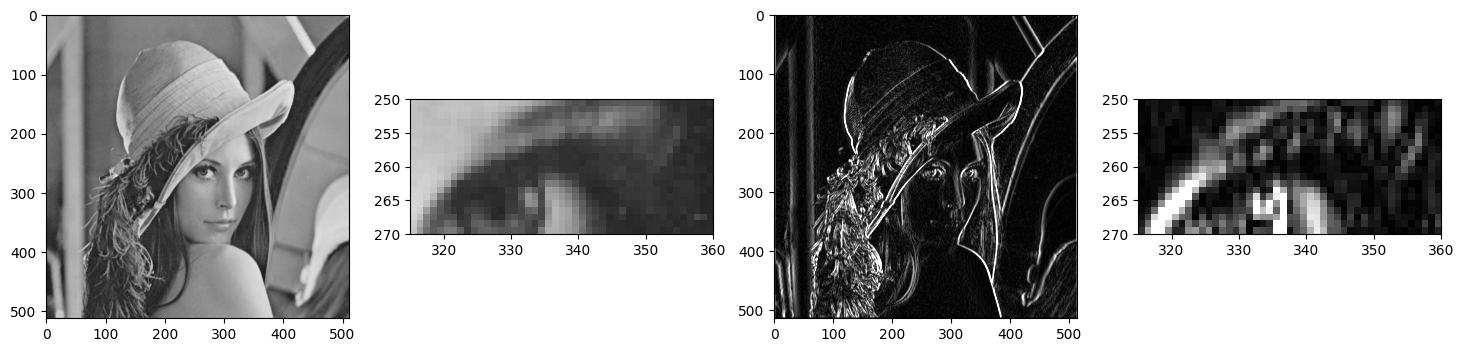

In [ ]:
# --- Sobel vertical ---
_, ax = plt.subplots(1,4, figsize=(18,20))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[1].imshow(x[kmin:kmax,lmin:lmax], 'gray', extent=[lmin,lmax,kmax,kmin],vmin=0, vmax=1)
hv = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
print(hv)
yv = np.abs(convolve2d(x,hv))
ax[2].imshow(yv, 'gray', vmin=0, vmax=1)
ax[3].imshow(yv[kmin:kmax,lmin:lmax], 'gray', extent=[lmin,lmax,kmax,kmin],vmin=0, vmax=1)


[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


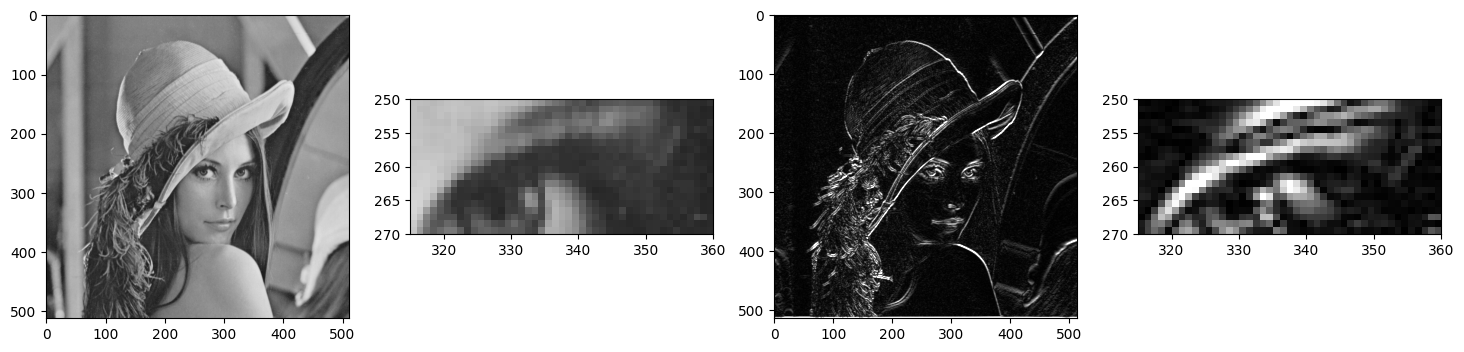

In [ ]:
# --- Sobel horizontal ---
_, ax = plt.subplots(1,4, figsize=(18,20))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[1].imshow(x[kmin:kmax,lmin:lmax], 'gray', extent=[lmin,lmax,kmax,kmin],vmin=0, vmax=1)
hh = hv.T
print(hh)
yh = np.abs(convolve2d(x,hh))
ax[2].imshow(yh, 'gray', vmin=0, vmax=1)
ax[3].imshow(yh[kmin:kmax,lmin:lmax], 'gray', extent=[lmin,lmax,kmax,kmin],vmin=0, vmax=1)


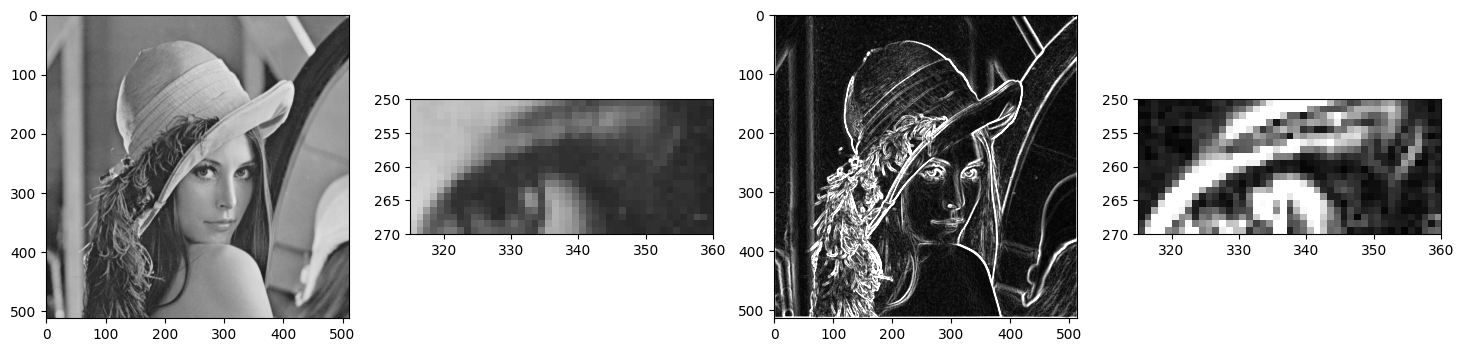

In [ ]:
# --- Both horizontal and vertical ---
_, ax = plt.subplots(1,4, figsize=(18,20))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[1].imshow(x[kmin:kmax,lmin:lmax], 'gray', extent=[lmin,lmax,kmax,kmin],vmin=0, vmax=1)
y = yv + yh
ax[2].imshow(y, 'gray', vmin=0, vmax=1)
ax[3].imshow(y[kmin:kmax,lmin:lmax], 'gray', extent=[lmin,lmax,kmax,kmin],vmin=0, vmax=1)


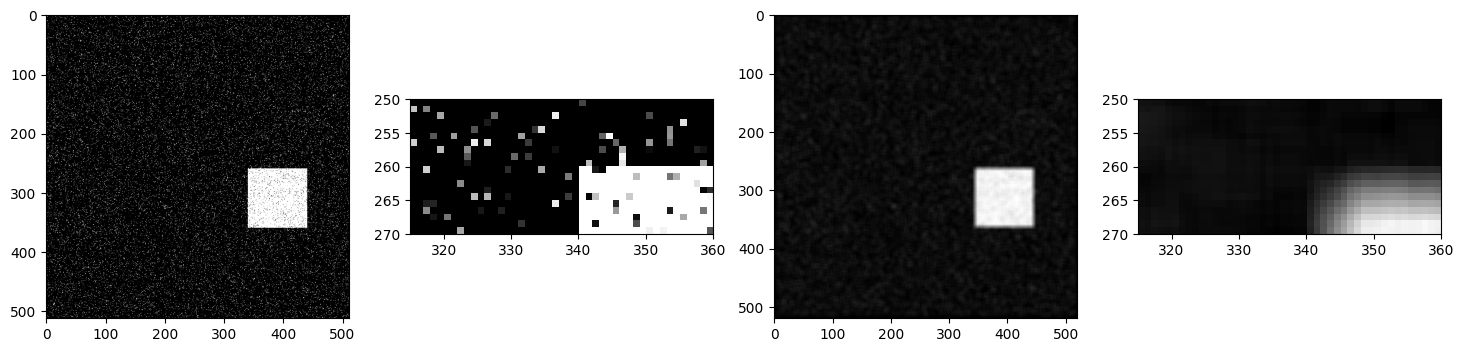

In [ ]:
# >>>>>>>>>>>>>>>>> #denoising_mean_vs_median  <<<<<<<<<<<<<<<<<<<<<<<<<
# generate image that will demonstrate it better than Lena ...
xsq = np.zeros((512,512))
xsq[260:360,340:440] = 1
# add noise
noise = np.random.uniform(0,1,(512,512))
wherenoise = (np.random.uniform(0,1,(512,512)) > 0.9)
xsq[wherenoise] = noise[wherenoise]
# zoom values
kmin = 250
kmax = 270
lmin = 315
lmax = 360

# --- low-pass filter
_, ax = plt.subplots(1,4, figsize=(18,20))
ax[0].imshow(xsq, 'gray', vmin=0, vmax=1)
ax[1].imshow(xsq[kmin:kmax,lmin:lmax], 'gray', extent=[lmin,lmax,kmax,kmin],vmin=0, vmax=1)
h = np.ones((9,9)) / 81
#print(h)
ysq = convolve2d(xsq,h)
ax[2].imshow(ysq, 'gray', vmin=0, vmax=1)
ax[3].imshow(ysq[kmin:kmax,lmin:lmax], 'gray', extent=[lmin,lmax,kmax,kmin],vmin=0, vmax=1)


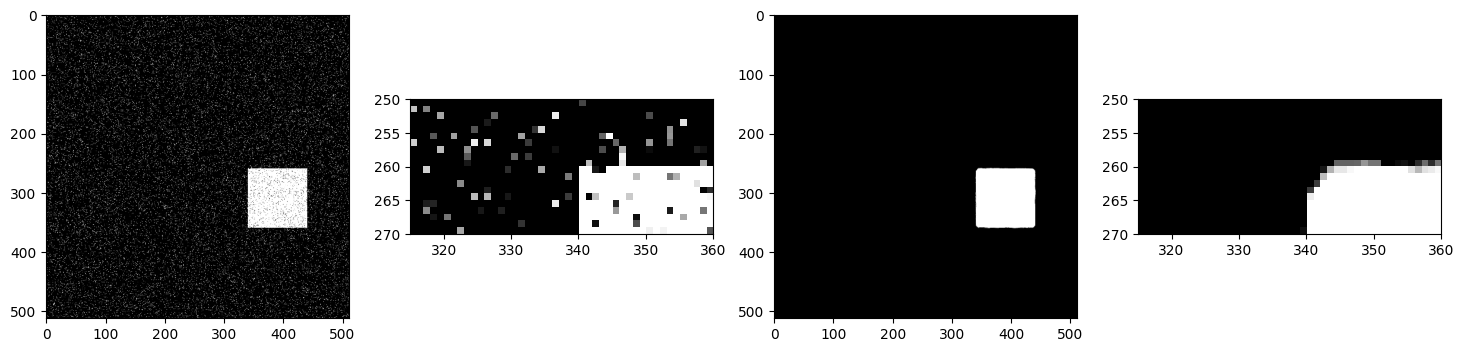

In [ ]:
# --- median filter 9x9
_, ax = plt.subplots(1,4, figsize=(18,20))
ax[0].imshow(xsq, 'gray', vmin=0, vmax=1)
ax[1].imshow(xsq[kmin:kmax,lmin:lmax], 'gray', extent=[lmin,lmax,kmax,kmin],vmin=0, vmax=1)
ysq = medfilt(xsq,9)
ax[2].imshow(ysq, 'gray', vmin=0, vmax=1)
ax[3].imshow(ysq[kmin:kmax,lmin:lmax], 'gray', extent=[lmin,lmax,kmax,kmin],vmin=0, vmax=1)


(100, 100) (512, 512)


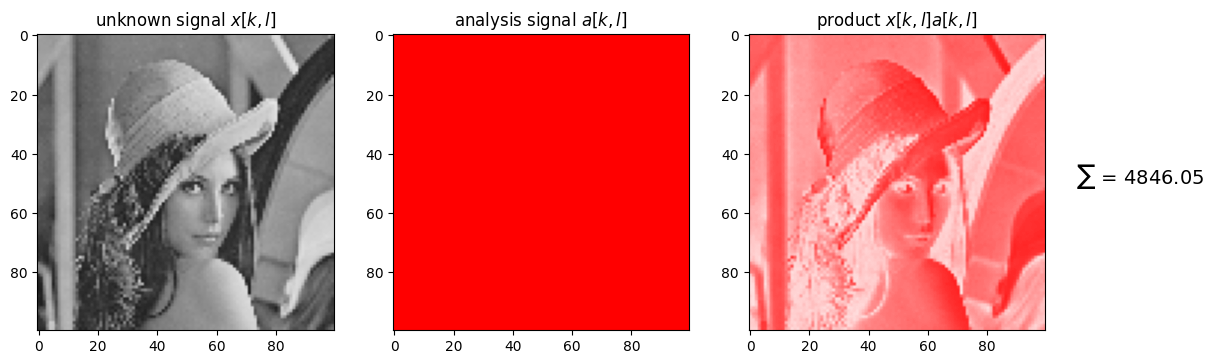

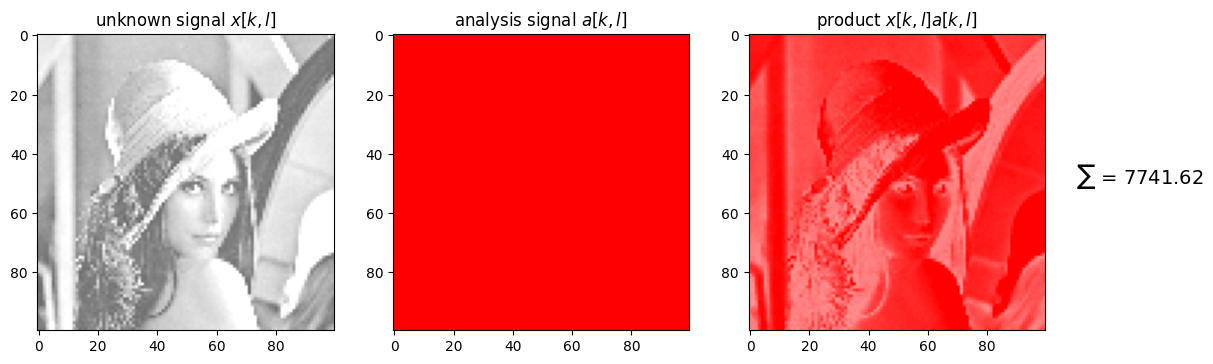

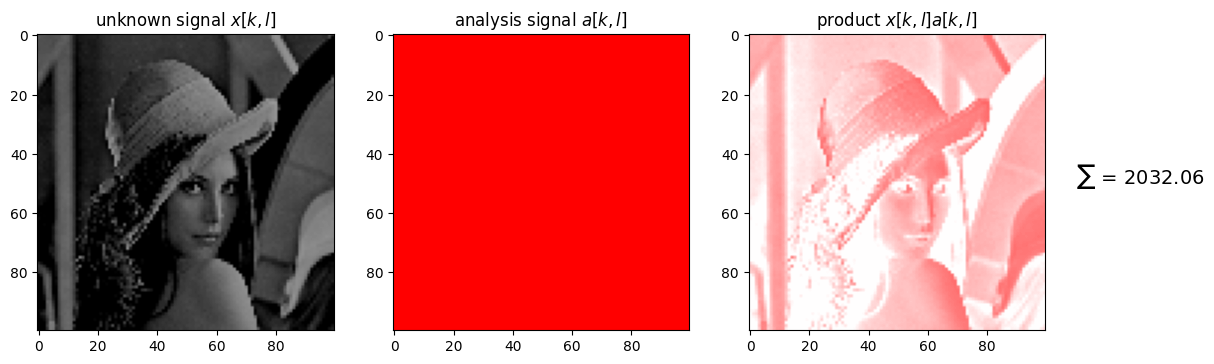

In [ ]:
# >>>>>>>>>>>>>>>>> #dc_image_analysis <<<<<<<<<<<<<<<<<<<<<<<<<
# load Lena only 100 x 100 samples ...
from scipy.ndimage import zoom
# read Lena again ...
img = plt.imread('lena_cb.tif')  # format is included in name
xlena = img.astype(float) / 255
xlena = zoom(xlena, 100/512)
print(xlena.shape, x.shape)

# analysis signal is a D.C. ...
a = np.ones((100,100))

# analyze 3 versions of Lena ...
for addbright in [0, 0.3, -0.3]:
    x = np.clip(xlena+addbright,0,1)
    _, ax = plt.subplots(1,3, figsize=(13,20))
    ax[0].imshow(x, 'gray', vmin=0, vmax=1)
    ax[0].set_title('unknown signal $x[k,l]$')
    ax[1].imshow(a, 'bwr', vmin=-1, vmax=1)
    ax[1].set_title('analysis signal $a[k,l]$')
    product = x * a
    ax[2].imshow(product, 'bwr', vmin=-1, vmax=1)
    ax[2].set_title('product $x[k,l] a[k,l]$')
    c = np.sum(product)
    ax[2].text(110, 50, r'$\sum$ = %.2f' % c,fontsize=14)

In [ ]:
# >>>>>>>>>>>>>>>>> #cosine_analysis <<<<<<<<<<<<<<<<<<<<<<<<<
# analysis signals are cos in all lines (1 period or 2 periods)
kall = np.arange(100)
cos1 = np.cos(2 * np.pi * kall / 100)
cos2 = np.cos(2 * np.pi * 2 * kall / 100)
a1 = np.outer(np.ones(100),cos1)
a2 = np.outer(np.ones(100),cos2)

# unknown signals
x1 = np.ones((100,100))
x2 = 0.5 * np.outer(np.ones(100),cos1) + 0.5
x3 = 0.5 * np.outer(np.ones(100),cos2) + 0.5

for a in [a1,a2]:
    for x in [x1, x2, x3]:
        _, ax = plt.subplots(1,3, figsize=(13,20))
        ax[0].imshow(x, 'gray', vmin=0, vmax=1)
        ax[0].set_title('unknown signal $x[k,l]$')
        ax[1].imshow(a, 'bwr', vmin=-1, vmax=1)
        ax[1].set_title('analysis signal $a[k,l]$')
        product = x * a
        ax[2].imshow(product, 'bwr', vmin=-1, vmax=1)
        ax[2].set_title('product $x[k,l] a[k,l]$')
        c = np.sum(product)
        ax[2].text(110, 50, r'$\sum$ = %.2f' % c,fontsize=14)

In [ ]:
# analysis signals are cos in all columns (1 period or 2 periods)
# unknown signals
x2 = x2.T
x3 = x3.T

# analyze 3 versions of Lena ...
for a in [a1.T,a2.T]:
    for x in [x1, x2, x3]:
        _, ax = plt.subplots(1,3, figsize=(13,20))
        ax[0].imshow(x, 'gray', vmin=0, vmax=1)
        ax[0].set_title('unknown signal $x[k,l]$')
        ax[1].imshow(a, 'bwr', vmin=-1, vmax=1)
        ax[1].set_title('analysis signal $a[k,l]$')
        product = x * a
        ax[2].imshow(product, 'bwr', vmin=-1, vmax=1)
        ax[2].set_title('product $x[k,l] a[k,l]$')
        c = np.sum(product)
        ax[2].text(110, 50, r'$\sum$ = %.2f' % c,fontsize=14)

In [ ]:
# >>>>>>>>>>>>>>>>> #cos_both_directions <<<<<<<<<<<<<<<<<<<<<<<<<
m = 7   # <--- change this
n = 3   # <--- change this

cosm = np.cos(2 * np.pi * m * kall / 100)
cosn = np.cos(2 * np.pi * n * kall / 100)
a1 = np.outer(np.ones(100),cosn)
a2 = np.outer(cosm,np.ones(100))
a3 = np.cos(2 * np.pi * (np.outer(m * kall / 100,np.ones(100)) + np.outer(np.ones(100),n * kall / 100)))

# analyze 3 versions of Lena ...
_, ax = plt.subplots(1,3, figsize=(13,20))
ax[0].imshow(a1, 'bwr', vmin=-1, vmax=1)
ax[1].imshow(a2, 'bwr', vmin=-1, vmax=1)
ax[2].imshow(a3, 'bwr', vmin=-1, vmax=1)


In [ ]:
# >>>>>>>>>>>>>>>>> #cosine_analysis_problem <<<<<<<<<<<<<<<<<<<<<<<<<
# analysis signals are cos in all lines (1 period or 2 periods)
kall = np.arange(100)
cos2 = np.cos(2 * np.pi * 2 * kall / 100)
sin2 = np.sin(2 * np.pi * 2 * kall / 100)
msin2 = -np.sin(2 * np.pi * 2 * kall / 100)
a = np.outer(np.ones(100),cos2)

# unknown signals
x1 = 0.5 * np.outer(np.ones(100),cos2) + 0.5
x2 = 0.5 * np.outer(np.ones(100),sin2) + 0.5
x3 = 0.5 * np.outer(np.ones(100),msin2) + 0.5

for x in [x1, x2, x3]:
    _, ax = plt.subplots(1,3, figsize=(13,20))
    ax[0].imshow(x, 'gray', vmin=0, vmax=1)
    ax[0].set_title('unknown signal $x[k,l]$')
    ax[1].imshow(a, 'bwr', vmin=-1, vmax=1)
    ax[1].set_title('analysis signal $a[k,l]$')
    product = x * a
    ax[2].imshow(product, 'bwr', vmin=-1, vmax=1)
    ax[2].set_title('product $x[k,l] a[k,l]$')
    c = np.sum(product)
    ax[2].text(110, 50, r'$\sum$ = %.2f' % c,fontsize=14)

In [ ]:
# >>>>>>>>>>>>>>>>> #2d_dft_examples <<<<<<<<<<<<<<<<<<<<<<<<<
# will work again with Lena 100x100.
img = plt.imread('lena_cb.tif')  # format is included in name
xlena = img.astype(float) / 255
x = zoom(xlena, 100/512)
print(xlena.shape, x.shape)
K = 100
L = 100

# get 2D DFT by library function ...
X = np.fft.fft2(x)
kall = np.arange(100)
lall = np.arange(100)

for [m,n] in [[0,0],[0,1],[3,0],[4,7]]:
    a = np.exp(-1j * 2 * np.pi * (np.outer(m * kall / K,np.ones(L)) + np.outer(np.ones(L),n * lall / L)))
    product = x * a
    c = np.sum(product)
    _, ax = plt.subplots(2,3, figsize=(13,8))
    ax[0,0].imshow(x, 'gray', vmin=0, vmax=1)
    ax[0,0].set_title('unknown signal $x[k,l]$')
    ax[0,1].imshow(np.real(a), 'bwr', vmin=-1, vmax=1)
    ax[0,1].set_title('real part of $a[k,l]$')
    ax[0,2].imshow(np.real(product), 'bwr', vmin=-1, vmax=1)
    ax[0,2].set_title('real part of $x[k,l] a[k,l]$')
    ax[0,2].text(110, 50, r'$\sum$ = %.2f' % np.real(c),fontsize=14)
    ax[1,0].imshow(x, 'gray', vmin=0, vmax=1)
    ax[1,0].set_title('unknown signal $x[k,l]$')
    ax[1,1].imshow(np.imag(a), 'BrBG', vmin=-1, vmax=1)
    ax[1,1].set_title('imag part of $a[k,l]$')
    ax[1,2].imshow(np.imag(product), 'BrBG', vmin=-1, vmax=1)
    ax[1,2].set_title('imag part of $x[k,l] a[k,l]$')
    ax[1,2].text(110, 50, r'$\sum$ = %.2f' % np.imag(c),fontsize=14)
    ax[1,2].text(110, 70, r'real $X[%d,%d]$ = %.2f' % (m,n,np.real(X[m,n])),fontsize=14)
    ax[1,2].text(110, 80, r'imag $X[%d,%d]$ = %.2f' % (m,n,np.imag(X[m,n])),fontsize=14)


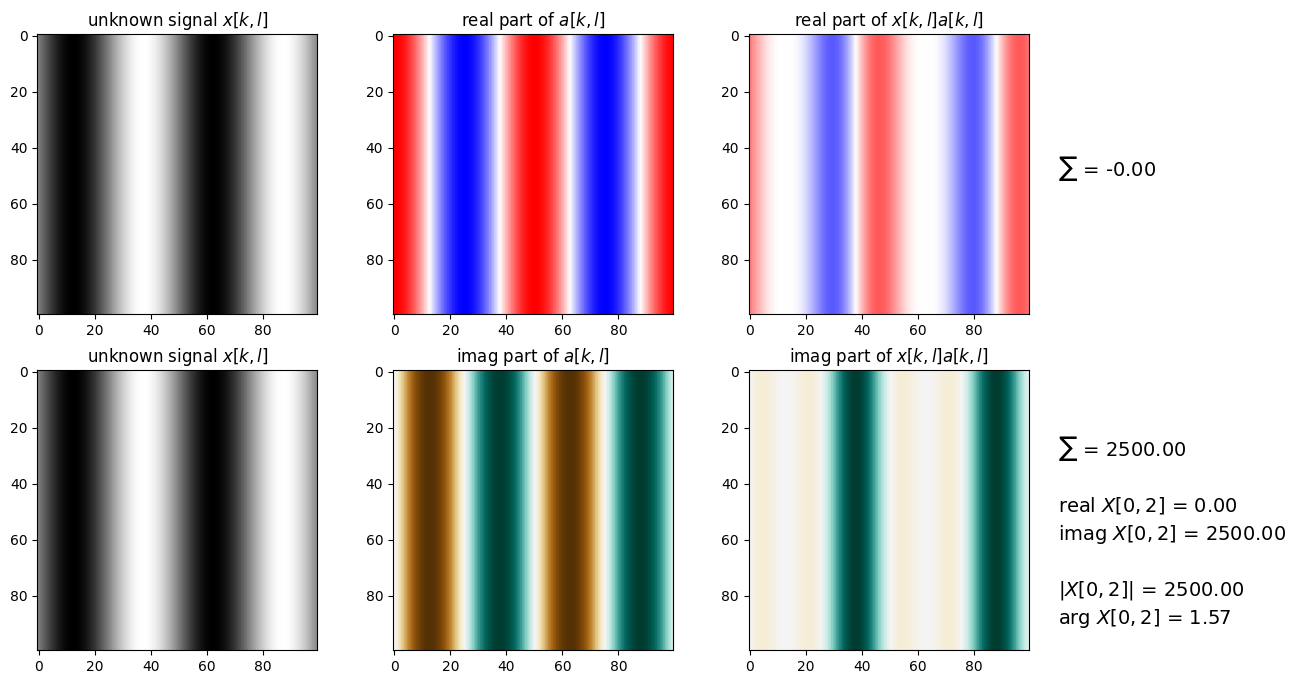

In [ ]:
# >>>>>>>>>>>>>>>>> #2d_dft_shifts <<<<<<<<<<<<<<<<<<<<<<<<<
# will work with unknown signal equal to differently shited sines ...
phase =  1/2 * np.pi  # <--------- change the phase here
cos = np.cos(2 * np.pi * 2 * lall / L + phase)
x = 0.5 * np.outer(np.ones(K),cos) + 0.5
X = np.fft.fft2(x)

for [m,n] in [[0,2]]:
    a = np.exp(-1j * 2 * np.pi * (np.outer(m * kall / K,np.ones(L)) + np.outer(np.ones(L),n * lall / L)))
    product = x * a
    c = np.sum(product)
    _, ax = plt.subplots(2,3, figsize=(13,8))
    ax[0,0].imshow(x, 'gray', vmin=0, vmax=1)
    ax[0,0].set_title('unknown signal $x[k,l]$')
    ax[0,1].imshow(np.real(a), 'bwr', vmin=-1, vmax=1)
    ax[0,1].set_title('real part of $a[k,l]$')
    ax[0,2].imshow(np.real(product), 'bwr', vmin=-1, vmax=1)
    ax[0,2].set_title('real part of $x[k,l] a[k,l]$')
    ax[0,2].text(110, 50, r'$\sum$ = %.2f' % np.real(c),fontsize=14)
    ax[1,0].imshow(x, 'gray', vmin=0, vmax=1)
    ax[1,0].set_title('unknown signal $x[k,l]$')
    ax[1,1].imshow(np.imag(a), 'BrBG', vmin=-1, vmax=1)
    ax[1,1].set_title('imag part of $a[k,l]$')
    ax[1,2].imshow(np.imag(product), 'BrBG', vmin=-1, vmax=1)
    ax[1,2].set_title('imag part of $x[k,l] a[k,l]$')
    ax[1,2].text(110, 30, r'$\sum$ = %.2f' % np.imag(c),fontsize=14)
    ax[1,2].text(110, 50, r'real $X[%d,%d]$ = %.2f' % (m,n,np.real(X[m,n])),fontsize=14)
    ax[1,2].text(110, 60, r'imag $X[%d,%d]$ = %.2f' % (m,n,np.imag(X[m,n])),fontsize=14)
    ax[1,2].text(110, 80, r'$|X[%d,%d]|$ = %.2f' % (m,n,np.abs(X[m,n])),fontsize=14)
    ax[1,2].text(110, 90, r'arg $X[%d,%d]$ = %.2f' % (m,n,np.angle(X[m,n])),fontsize=14)


In [ ]:
# >>>>>>>>>>>>>>>>> #2d_dft_Lena_squares <<<<<<<<<<<<<<<<<<<<<<<<<
img = plt.imread('lena_cb.tif')  # format is included in name
x = img.astype(float) / 255
X = np.abs ( np.fft.fft2(x) )   # taking already magnitude
_, ax = plt.subplots(1,3, figsize=(13,20))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[0].set_title('$x[k,l]$')
ax[1].imshow(X[:256,:256], 'gray', vmin=0, vmax=200)
ax[1].set_title('$|X[m,n]|$')
ax[2].imshow(np.log(X[:256,:256]), 'gray', vmin=0)
ax[2].set_title('log $|X[m,n]|$')
print(np.array_str(X[:5,:5], precision = 0))

# generate a wilder signal with more high frequencies ...
K = 512
L = 512
x = np.zeros ((K,L))
# place 50 randomly spaced white  squares ...
Nsquares = 50
xpositions = np.random.uniform(0, 450, Nsquares).astype(int);
ypositions = np.random.uniform(0, 450, Nsquares).astype(int);
sizes = np.random.uniform(1, 50, Nsquares).astype(int);
# place the squares
for xpos,ypos,size in zip(xpositions,ypositions,sizes):
    x[xpos:(xpos+size), ypos:(ypos+size)] = 1
# add some high frequencies and clip
kall = np.arange(512)
lall = kall
myargs = np.outer(np.ones(K), 2*np.pi*80/L * lall + np.pi/2) + np.outer(2*np.pi*157/K * kall - np.pi/3,np.ones(L))
x = np.clip(x + 0.5 * np.cos(myargs),0,1)

# 2d dft and show
X = np.abs ( np.fft.fft2(x) )   # taking already magnitude
_, ax = plt.subplots(1,3, figsize=(13,20))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[0].set_title('$x[k,l]$')
ax[1].imshow(X[:256,:256], 'gray', vmin=0, vmax=100)
ax[1].set_title('$|X[m,n]|$')
ax[2].imshow(np.log(X[:256,:256]), 'gray', vmin=0)
ax[2].set_title('log $|X[m,n]|$')
print(np.array_str(X[:5,:5], precision = 0))


In [ ]:
# >>>>>>>>>>>>>>>>> #2d_dft_full <<<<<<<<<<<<<<<<<<<<<<<<<
X = np.abs ( np.fft.fft2(x) )   # taking already magnitude
_, ax = plt.subplots(1,3, figsize=(13,20))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[0].set_title('$x[k,l]$')
ax[1].imshow(X, 'gray', vmin=0, vmax=100)
ax[1].set_title('$|X[m,n]|$')
ax[1].plot([0,511],[256,256],color='red')
ax[1].plot([256,256],[0,511],color='red')
XX = np.fft.fftshift(X)
ax[2].imshow(XX, 'gray', vmin=0, vmax=100,extent=[-256,256,256,-256])
ax[2].set_title('reshuffled $|X[m,n]|$')


In [ ]:
# >>>>>>>>>>>>>>>>> #2d_dft_idft_filtering <<<<<<<<<<<<<<<<<<<<<<<<<
img = plt.imread('lena_cb.tif')  # format is included in name
x = img.astype(float) / 255
X = np.fft.fft2(x)
_, ax = plt.subplots(1,4, figsize=(13,20))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[0].set_title('$x[k,l]$')
ax[1].imshow(np.abs(X), 'gray', vmin=0, vmax=100)
ax[1].set_title('$|X[m,n]|$')
ax[2].imshow(np.abs(X), 'gray', vmin=0, vmax=100)
ax[2].set_title('processed $|X[m,n]|$')
y = np.real(np.fft.ifft2 (X))
ax[3].imshow(y, 'gray', vmin=0, vmax=1)
ax[3].set_title('$y[k,l]$')

# no phase
_, ax = plt.subplots(1,4, figsize=(13,20))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[0].set_title('$x[k,l]$')
ax[1].imshow(np.abs(X), 'gray', vmin=0, vmax=100)
ax[1].set_title('$|X[m,n]|$')
ax[2].imshow(np.abs(X), 'gray', vmin=0, vmax=100)
ax[2].set_title('processed $|X[m,n]|$')
y = np.real(np.fft.ifft2 (np.abs(X)))
ax[3].imshow(y, 'gray', vmin=0, vmax=1)
ax[3].set_title('$y[k,l]$')

# filtering with a mask
KEEP = 25
M = np.zeros(X.shape)
M[0:KEEP,0:KEEP] = 1
M[0:KEEP,-KEEP:] = 1
M[-KEEP:,0:KEEP] = 1
M[-KEEP:,-KEEP:] = 1
Y = X * M
y = np.real(np.fft.ifft2 (Y))
_, ax = plt.subplots(1,4, figsize=(13,20))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[0].set_title('$x[k,l]$')
ax[1].imshow(np.abs(X), 'gray', vmin=0, vmax=100)
ax[1].set_title('$|X[m,n]|$')
ax[2].imshow(np.abs(Y), 'gray', vmin=0, vmax=100)
ax[2].set_title('processed $|X[m,n]|$')
ax[3].imshow(y, 'gray', vmin=0, vmax=1)
ax[3].set_title('$y[k,l]$')


In [ ]:
# >>>>>>>>>>>>>>>>> #filter_corresponding_to_rectangular_freq_mask <<<<<<<<<<<<<<<<<<<<<<<<<
m = np.real(np.fft.ifft2 (M))
_, ax = plt.subplots(1,4, figsize=(13,20))
ax[0].imshow(np.fft.fftshift(M), 'gray', vmin=0, vmax=1, extent=[-256,256,256,-256])
ax[0].set_title('reshuffled $M[m,n]$')
ax[1].imshow(np.abs(M), 'gray')
ax[1].set_title('$M[m,n]$')
# we need to show zoom here, too small if all shown ...
ax[2].imshow(m[0:50,0:50], 'bwr', vmin=-np.max(m), vmax=np.max(m))
ax[2].set_title('$m[k,l]$')
mvisu = np.fft.fftshift(m)
ax[3].imshow(mvisu[(256-50):(256+50),(256-50):(256+50)], 'bwr',vmin=-np.max(m), vmax=np.max(m), extent=[-50,50,50,-50])
ax[3].set_title('reshuffled $m[k,l]$')


In [ ]:
# >>>>>>>>>>>>>>>>> #dct_1 <<<<<<<<<<<<<<<<<<<<<<<<<
N = 100
DCT_bases = np.zeros((N,N))
n = np.arange(N)
kall = np.arange(N)
for k in kall:
    dct_base = np.cos(np.pi / N * (n+1/2) * k)
    DCT_bases[k,:] = dct_base

_, ax = plt.subplots(1,2, figsize=(14,4))
ax[0].plot(n,DCT_bases[0:5].T)
ax[1].plot(DCT_bases[0:5,0:3].T)

# compute it by hand one some sample signal and make it coherent to Matlab ...
x = lfilter([0.25,0.25,0.25,0.25],1,np.random.standard_normal(N))
c = np.matmul(DCT_bases,x)
# define and use normalizers
normalizers = np.ones(N) * np.sqrt(2/N)
normalizers[0] = np.sqrt(1/N)
c = c * normalizers

# compute it by function ...
cscipy = dct(x,norm='ortho')

_, ax = plt.subplots(1,2, figsize=(14,4))
ax[0].plot(n,x)
ax[0].set_title('$x[n]$')
ax[1].plot(kall,c)
ax[1].plot(kall,cscipy)
ax[1].set_title('DCT coefficients $X[k]$')


In [ ]:
# >>>>>>>>>>>>>>>>> #dct_filtering <<<<<<<<<<<<<<<<<<<<<<<<<
img = plt.imread('lena_cb.tif')  # format is included in name
x = img.astype(float) / 255
X = dctn(x,norm='ortho')
#print(np.array_str(X[:5,:5], precision = 0))

KEEP = 25
M = np.zeros(X.shape)
M[0:KEEP,0:KEEP] = 1
Y = X * M
#Y = X
y = idctn(Y, norm='ortho')

_, ax = plt.subplots(1,4, figsize=(13,20))
ax[0].imshow(x, 'gray', vmin=0, vmax=1)
ax[0].set_title('$x[k,l]$')
ax[1].imshow(X[:100,:100], 'bwr', vmin=-10, vmax=10)
ax[1].set_title('$DCT X[m,n]$')
ax[2].imshow(Y[:100,:100], 'bwr', vmin=-10, vmax=10)
ax[2].set_title('processed DCT $X[m,n]$')
ax[3].imshow(y, 'gray', vmin=0, vmax=1)
ax[3].set_title('$y[k,l]$')
